<a href="https://colab.research.google.com/github/Sh-Dulguun/Dulguun.github.io/blob/master/Implementation_of_matrix_product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Problem 1] Creating random numbers**
Solve the matrix product of A and B by hand.

Please also explain the calculation process using markdown text.


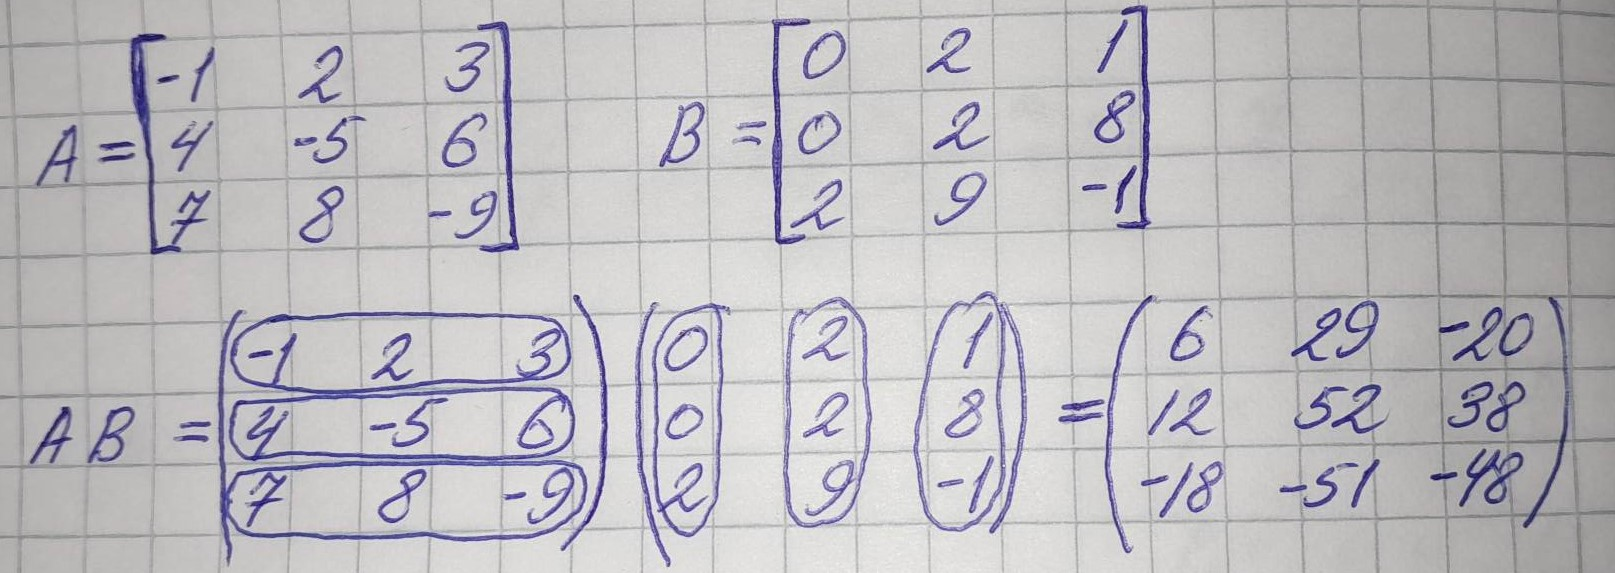'A' matrix row only acts to multiply when it is equal to 'B' matrix column.
A(m * n) * B(n * k)= C(m * k)

# **[Problem 2] Calculation by NumPy function**
This matrix product of NumPy can be easily calculated using np.matmul() or np.dot() , or the @ operator.

Use these to calculate the matrix product.

《Three types of difference》

 np.matmul()  and  np.dot()  behave differently in 3D or higher arrays. The  @  operator works the same as  np.matmul() .

In the matrix multiplication of a two-dimensional array like this time np.matmul() or @ Operators are officially recommended. The following is a quote from the explanation of np.dot() .

In [3]:
import numpy as np
a_ndarray = np.array([[-1, 2, 3], [4, -5, 6], [7, 8, -9]])
b_ndarray = np.array([[0, 2, 1], [0, 2, -8], [2, 9, -1]])

c_ndarray_matmull = np.matmul(a_ndarray,b_ndarray)
c_ndarray_at = a_ndarray @ b_ndarray
c_ndarray_dot = np.dot(a_ndarray,b_ndarray)
print('np.matmul: {}'.format(c_ndarray_matmull))
print('@: {}'.format(c_ndarray_at))
print('np.dot: {}'.format(c_ndarray_dot))

np.matmul: [[  6  29 -20]
 [ 12  52  38]
 [-18 -51 -48]]
@: [[  6  29 -20]
 [ 12  52  38]
 [-18 -51 -48]]
np.dot: [[  6  29 -20]
 [ 12  52  38]
 [-18 -51 -48]]


# **[Problem 3] Implementation of calculation of a certain element**
When doing the calculations by hand, you may have first paid attention to row 0 of matrix A and column 0 of matrix B, and then performed the following calculations.

 

1.   Multiply the (0,0) element $a_{0, 0}$ of matrix A with the (0,0) element $b_{0,0}$ of matrix B
2.   Multiply the (0,1) element $a_{0, 1}$ of matrix A with the (1,0) element $b_{1, 0}$ of matrix B

1.   Multiply the (0,2) element $a_{0, 2}$ of matrix A with the (2,0) element $b_{2, 0}$ of matrix B
2.  Add all those values together

Expressed as a formula

2
∑
k
=
0
 
a0
,
k
b
k
,
0
!!

Write code to do this calculation without using np.matmul() , np.dot() or @ operators.

In [6]:
if(a_ndarray.shape[1] == b_ndarray.shape[0]):
  c_ndarray = np.empty((a_ndarray.shape[0],b_ndarray.shape[1]),dtype=np.int8)
  for i in range(a_ndarray.shape[0]):
    for j in range(b_ndarray.shape[1]):
      for l in range(b_ndarray.shape[1]):
        c_ndarray[i,j] = c_ndarray[i,j]+a_ndarray[i,l]*b_ndarray[l,j]
  print(c_ndarray)
else: 
  print('A matrix cannot be multiply by B matrix. ')

[[ -20  107   81]
 [  26  104   76]
 [ -36 -102  -96]]


# **[Problem 4] Creating a function that performs matrix multiplication**
Extend the code in Problem 3 to complete the matrix product scratch implementation. It should be a function that takes matrices A and B as arguments and returns the matrix product.

When calculating the matrix product, you will repeat the calculation in Problem 3 for different rows and columns.

Each element $c_{i, j}$ of the matrix C of the calculated result $3 \times 3$ is expressed as follows.

c
i
,
j
=
2
∑
k
=
0
 
a
i
,
k
b
k
,
j
By using the for statement and moving the index of ndarray, a total of 9 elements can be calculated. You can increase the index $i$ or $j$ by 1 to move to the next row or column.

In [7]:
def matrix_multiply(a_ndarray,b_ndarray):
  if(a_ndarray.shape[1] == b_ndarray.shape[0]):
    c_ndarray = np.empty((a_ndarray.shape[0],b_ndarray.shape[1]),dtype=np.int8)
    for i in range(a_ndarray.shape[0]):
      for j in range(b_ndarray.shape[1]):
        for l in range(b_ndarray.shape[1]):
          c_ndarray[i,j] = c_ndarray[i,j]+a_ndarray[i,l]*b_ndarray[l,j]
    return c_ndarray
  else: 
    print('A matrix cannot be multiply by B matrix.')

c_ndarray_def = matrix_multiply(a_ndarray, b_ndarray)
c_ndarray_def

array([[ -46,  -23,   66],
       [  38, -100,  114],
       [ -54,  103,  112]], dtype=int8)

# **[Problem 5] Judge the input whose calculation is not defined**
Depending on the implementation method, the function created in Problem 4 may work even if this D and E array is input. In this case, incorrect calculations will be made. Also, even if an error occurs in the middle, a message that is hard to understand why the error occurred is displayed directly.

You can prevent this by using an if statement or similar, and add code to display the problem in the input form using print() .

In [8]:
def matrix_multiply(a_ndarray,b_ndarray):
  if(a_ndarray.shape[1] == b_ndarray.shape[0]):
    c_ndarray = np.empty((a_ndarray.shape[0],b_ndarray.shape[1]),dtype=np.int8)
    for i in range(a_ndarray.shape[0]):
      for j in range(b_ndarray.shape[1]):
        for l in range(b_ndarray.shape[1]):
          c_ndarray[i,j] = c_ndarray[i,j]+a_ndarray[i,l]*b_ndarray[l,j]
    return c_ndarray
  else: 
    print('A matrix cannot be multiply by B matrix.')

c_ndarray_def = matrix_multiply(a_ndarray, b_ndarray)
c_ndarray_def

array([[ 102,  -73, -121],
       [  14,   52,   38],
       [ -18,  -51,  -48]], dtype=int8)

# **[Problem 6] Transposition**
Transposing one matrix allows you to calculate the matrix product.

Transpose it using the np.transpose() or .T attributes and calculate the matrix product.

In [9]:
d_ndarray = np.array([[-1, 2, 3], [4, -5, 6]])
e_ndarray = np.array([[-9, 8, 7], [6, -5, 4]])
if d_ndarray.shape[0] == e_ndarray.shape[1]:
    c_ndarray = matrix_multiply(d_ndarray, e_ndarray)
else:
    print('d,e matrix first shape d:{} , e:{}'.format(d_ndarray.shape,e_ndarray.shape))
    print('e matrix transposed shape e:{}'.format((np.transpose(e_ndarray).shape)))
    c_ndarray = matrix_multiply(d_ndarray, np.transpose(e_ndarray))
    print("c_ndarray:", c_ndarray)


d,e matrix first shape d:(2, 3) , e:(2, 3)
e matrix transposed shape e:(3, 2)
c_ndarray: [[25  0]
 [45 51]]
